# Project 5 - Exploration Data Analysis and Visualization

Exploratory data analysis (EDA) is an approach for summarizing and visualizing the important characteristics of a data set. It gives us more understanding of the data’s underlying structure and variables before feature engineering, formal modeling, model tuning, and other data analysis techniques. In this mini project, you will be introduced to some ways to explore data efficiently with different packages so that you can develop intuition about your data set:
* Import and briefly check data with python data manipulation tools Pandas
* Get basic description of data, descriptive statistics, checking rows and columns.
* Time series analysis
* Simple predictive modeling
* Discover patterns in data by visualizing data with python data visualization packages sucha as Matplotlib, and Seaborn, or by using functions to compute the correlation between features.

### Dataset
* The data set we are going to be using is from a language learning application on smartphones. It contains user info, lexeme info and session info. We have already joined them into one single table for our analysis purpose.

### General Philosophy and Steps for this project
 - Data preparation: load all needed dependencies and packages, setup plot style
 - Data Import: load data to pandas dataframe and check
 - Post questions: propose hypothesis based on your intuition
 - Visualization: Test you intuition and hypothesis using python visualization packages, such as Matplotlib.

## Duolingo Exploratory Data Analysis

In [3]:
# Import all dependencies we need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import datetime as dt
import seaborn as sns
%matplotlib inline 

In [2]:
# avaliable plot styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Import data

In [4]:
# Since this dataset is 1.3G and we only take a look of first 1000000 rows #
df = pd.read_csv('learning_traces.13m.csv', nrows=1000000)

In [4]:
# Print out the head of our dataset
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [5]:
# Check the infomation of our data, such as columns, data type #
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
p_recall             1000000 non-null float64
timestamp            1000000 non-null int64
delta                1000000 non-null int64
user_id              1000000 non-null object
learning_language    1000000 non-null object
ui_language          1000000 non-null object
lexeme_id            1000000 non-null object
lexeme_string        1000000 non-null object
history_seen         1000000 non-null int64
history_correct      1000000 non-null int64
session_seen         1000000 non-null int64
session_correct      1000000 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ MB


In [6]:
# Dimension of dataset #
df.shape

(1000000, 12)

#### Please try to answer the following questions when you follow the data visualization procedures below:

 - How many users are there from every country?
 - How many different languages are being studied
 - Are there differences between users from different coutries
 - Time series analysis 
     - temporal behaviour of users
     - when do people study?
     - how often do they study
     - timestamp
 - Predictive modelling
     - corellations of p_recall with various features  

### Numerical data

In [7]:
# list all types that only take numerical ones
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

#### 1. Create a dataframe that only takes numerical data and show the head

In [8]:
df.select_dtypes(['float64', 'int64']).head()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,6,4,2,2
1,0.5,1362076081,27649635,4,4,2,1
2,1.0,1362076081,27649635,5,4,1,1
3,0.5,1362076081,27649635,6,5,2,1
4,1.0,1362076081,27649635,4,4,1,1


#### 2. Draw histgrams to show the distributions of all the numerical data from the dataframe we just created.

p_recall


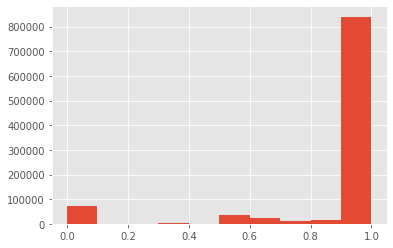

timestamp


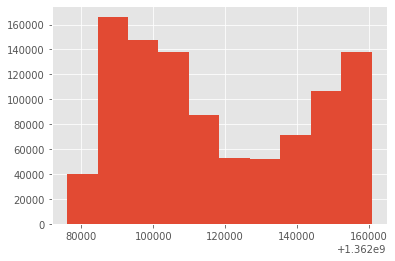

delta


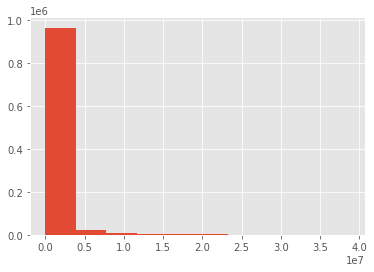

history_seen


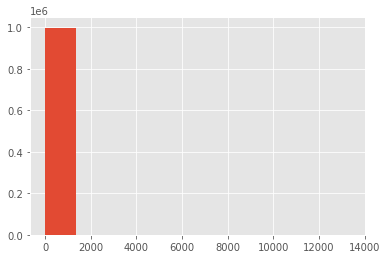

history_correct


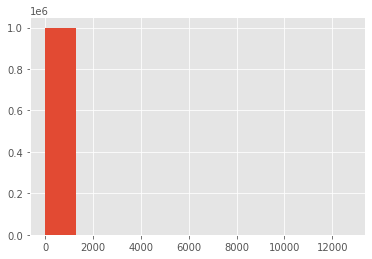

session_seen


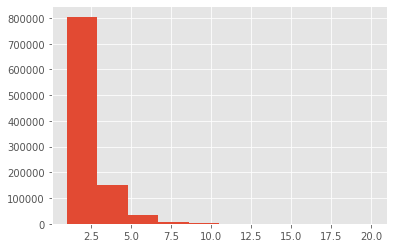

session_correct


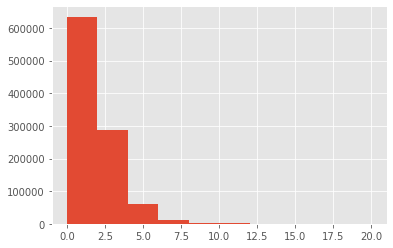

In [14]:
for i in df.select_dtypes(['float64', 'int64']).columns:
    print(i)
    plt.hist(df[i], bins = 10)
    plt.show()

### Feature to feature relationship

Trying to plot all the numerical features in a pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

#### 3. Compute pairwise correlation matrix of numerical columns and draw a heatmap using seaborn plot

In [ ]:
Method of correlation.
pearson: standard correlation coefficient
kendall: kendall tau correlation coefficient
spearman: Spearman rank correlation     

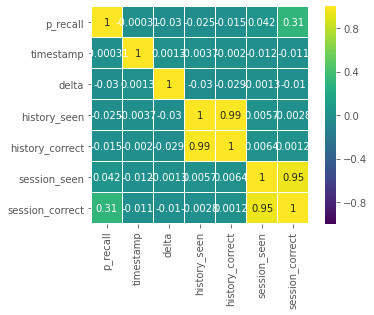

In [6]:
cor = df.select_dtypes(['float64', 'int64']).corr()
ax = sns.heatmap(cor, cmap='viridis', vmax=1, vmin=-1, linewidths=0.1, 
                 annot=True, annot_kws={"size": 10}, square=True);

### Categorical data - Countries

In [25]:
df.select_dtypes(['O']).head()

,user_id,learning_language,ui_language,lexeme_id,lexeme_string
0,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>
1,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>
2,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>
3,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>
4,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>


#### 1. What are user interface languages? 

In [27]:
df.ui_language.unique()

array(['en', 'pt', 'es', 'it'], dtype=object)

#### 2. Do a value_counts() to see how popular each interface language is

In [28]:
df.ui_language.value_counts()

en    598123
es    298705
pt     72876
it     30296
Name: ui_language, dtype: int64

#### 3. Draw a pie plot to visualize user interface language distribution with percentage on it

<AxesSubplot:>

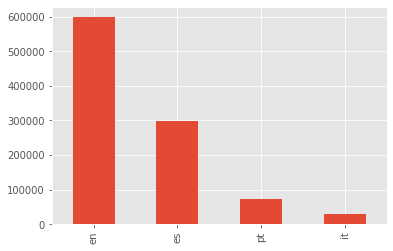

In [7]:
df.ui_language.value_counts().plot.bar()

#### 4. Draw a pie plot of languages that individuals are learning

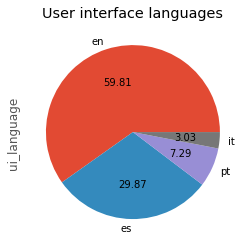

In [8]:
df.ui_language.value_counts().plot.pie(autopct="%1.2lf")
plt.title('User interface languages')
plt.show()

#### 5. Pie plot to visualize what languages being learned by people whose interface language is English

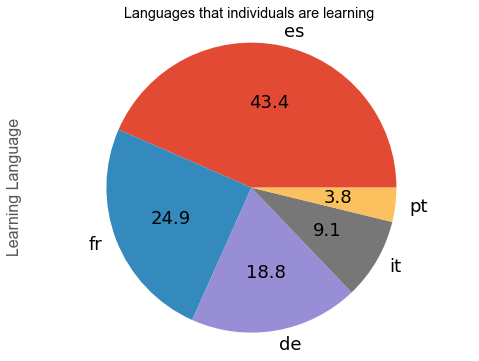

In [87]:
plt.figure(figsize=(8, 6))
df[df.ui_language == 'en']['learning_language'].value_counts().plot.pie(autopct="%1.1lf", fontsize=18)
plt.title('Languages that individuals are learning', fontname='Arial')
plt.axis('equal')
plt.ylabel('Learning Language', fontname='Arial', fontsize=16)
plt.show()

#### 6. Let's see what languages being learned by people whose interface languages are English, Spanish, Italian, and Potuguese by subplot four pie plots

In [68]:
# Type you answer below 
df_learning_es = df[df.ui_language=="es"].learning_language.value_counts().to_frame()
df_learning_es['percent'] = round(df_learning_es['learning_language']/sum(df_learning_es['learning_language']), 3)*100
df_learning_es['percent'] = df_learning_es['percent'].astype('str') + "%"

df_learning_pt = df[df.ui_language=="pt"].learning_language.value_counts().to_frame()
df_learning_pt['percent'] = round(df_learning_pt['learning_language']/sum(df_learning_pt['learning_language']), 3)*100
df_learning_pt['percent'] = df_learning_pt['percent'].astype('str') + "%"

df_learning_it = df[df.ui_language=="it"].learning_language.value_counts().to_frame()
df_learning_it['percent'] = round(df_learning_it['learning_language']/sum(df_learning_it['learning_language']), 3)*100
df_learning_it['percent'] = df_learning_it['percent'].astype('str') + "%"

In [75]:
df_learning

,learning_language,percent
es,259818,43.4%
fr,148692,24.9%
de,112709,18.8%
it,54147,9.1%
pt,22757,3.8%


In [82]:
fig = plt.figure(figsize=(18,10), dpi=1600)
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(df_learning.learning_language, labels=df_learning.percent)
plt.title('English')
#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(df_learning_es.learning_language, labels=df_learning_es.percent)
plt.title('ES')
#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(df_learning_pt.learning_language, labels=df_learning_pt.percent)
plt.title('PT')
#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(df_learning_it.learning_language, labels=df_learning_it.percent)
plt.title('IT')

plt.show()

## Users Activity patterns

#### 1. Let's see users activity in session by doing a value counts and do a summary statistics

In [86]:
df.session_seen.value_counts()

1     596858
2     208146
3     101697
4      48155
5      23301
6      10581
7       4763
8       2410
9       1443
10       989
11       487
12       296
13       238
16       224
14       204
15       135
19        25
17        20
18        15
20        13
Name: session_seen, dtype: int64

In [13]:
user_activity = df['user_id'].value_counts()
user_activity.describe()

count    20204.000000
mean        49.495149
std         74.911279
min          1.000000
25%          8.000000
50%         26.000000
75%         59.000000
max       2041.000000
Name: user_id, dtype: float64

#### 2. Compute the duration of dataset

In [14]:
duration = df.groupby("user_id").apply(lambda x: (x['timestamp'].max() - x['timestamp'].min())/3600).to_frame()

In [16]:
duration.head()

,0
user_id,
u:-DF,0.496389
u:-R6,0.000000
u:-Re,0.000000
u:-TV,19.507500
u:-_-,0.000000


In [18]:
activity_df = df['user_id'].value_counts().to_frame().merge(duration, how='inner', left_index = True, right_index = True)
activity_df = activity_df.reset_index()
activity_df.columns = ['user_id', 'entries', 'duration']

In [20]:
activity_df.head()

,user_id,entries,duration
0,u:ia1J,2041,3.074167
1,u:bcH_,1531,7.008889
2,u:eMgB,1233,20.626389
3,u:wpZ,1230,17.878889
4,u:gp3v,1037,19.651389


In [21]:
user_act = df.merge(activity_df, how="left", on="user_id")

In [22]:
user_act['activity'] = user_act[['entries', 'duration']].apply(lambda x:x[0]/x[1] if x[1]!=0 else 0, axis=1)

In [23]:
duration = (user_act.timestamp.max() - user_act.timestamp.min())/3600
print('Duration of dataset is ' + str(duration) + 'hours')

Duration of dataset is 23.500555555555554hours


In [27]:
user_act.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,entries,duration,activity
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,31,1.752222,17.69182
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,31,1.752222,17.69182
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,31,1.752222,17.69182
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,31,1.752222,17.69182
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,31,1.752222,17.69182


## Boxplots

#### 3. Compare activity levels for people with different 4 user interface languages by drawing boxplots

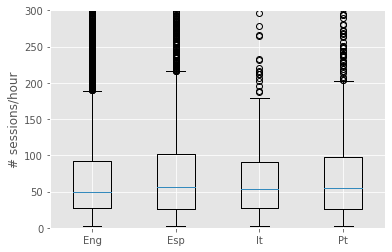

In [29]:
plt.figure()
plt.boxplot([user_act[user_act.ui_language == 'en']['activity'].value_counts(),
           user_act[user_act.ui_language == 'es']['activity'].value_counts(),
           user_act[user_act.ui_language == 'it']['activity'].value_counts(),
           user_act[user_act.ui_language == 'pt']['activity'].value_counts()])
plt.xticks([1,2,3,4], ['Eng', 'Esp', 'It', 'Pt'])
plt.ylabel('# sessions/hour')
plt.ylim(0,300)
plt.show()

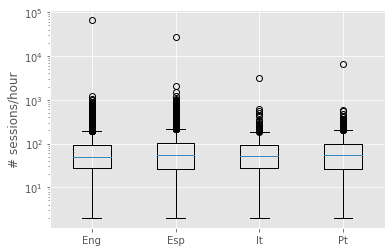

In [30]:
plt.figure()
plt.boxplot([user_act[user_act.ui_language == 'en']['activity'].value_counts(),
           user_act[user_act.ui_language == 'es']['activity'].value_counts(),
           user_act[user_act.ui_language == 'it']['activity'].value_counts(),
           user_act[user_act.ui_language == 'pt']['activity'].value_counts()])
plt.xticks([1,2,3,4], ['Eng', 'Esp', 'It', 'Pt'])
plt.ylabel('# sessions/hour')
plt.yscale('log')
plt.show()

## Regression and predictive tasks

In [11]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


#### 1. Scatter plot the relation between session_seen and p_recall

In [135]:
df['session_seen'].value_counts()

1     596858
2     208146
3     101697
4      48155
5      23301
6      10581
7       4763
8       2410
9       1443
10       989
11       487
12       296
13       238
16       224
14       204
15       135
19        25
17        20
18        15
20        13
Name: session_seen, dtype: int64

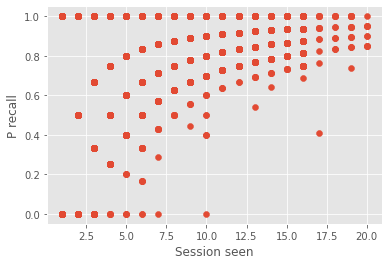

In [31]:
plt.figure()
plt.scatter(df['session_seen'], df['p_recall'])
plt.xlabel('Session seen')
plt.ylabel('P recall')
plt.show()

#### 2. Scatter plot the same distribution with log scale. 

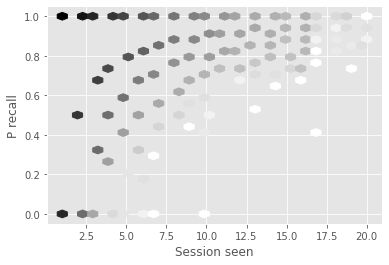

In [32]:
plt.figure()
plt.hexbin(df['session_seen'], df['p_recall'], gridsize=30, bins='log', mincnt=1, cmap='binary')
plt.xlabel('Session seen')
plt.ylabel('P recall')
plt.show()

#### 3. Goupby session_seen and take aveage on it as x, and scatter plot relation with p_recall as y

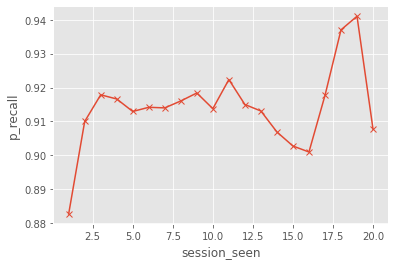

In [37]:
plt.plot(user_act.groupby('session_seen').mean()['p_recall'], 'x-')
plt.xlabel('session_seen')
plt.ylabel('p_recall')
plt.show()

#### 4. Goupby history_seen and take aveage on it as x, and scatter plot relation with p_recall as y

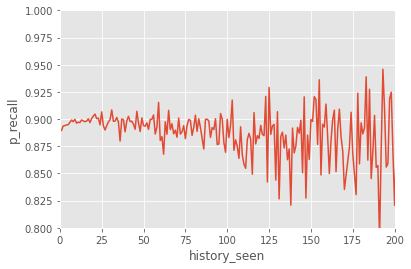

In [38]:
plt.plot(user_act.groupby('history_seen').mean()['p_recall'])
plt.xlim(0, 200)
plt.ylim(0.8, 1)
plt.xlabel('history_seen')
plt.ylabel('p_recall')
plt.show()

#### 5. Create a dataframe with user_id and user_activity based on user_id index

In [39]:
user_activity.head()

u:ia1J    2041
u:bcH_    1531
u:eMgB    1233
u:wpZ     1230
u:gp3v    1037
Name: user_id, dtype: int64

In [40]:
a = pd.DataFrame()
a['user_id'] = user_activity.index
a['user_activity'] = user_activity.values
a.head()

,user_id,user_activity
0,u:ia1J,2041
1,u:bcH_,1531
2,u:eMgB,1233
3,u:wpZ,1230
4,u:gp3v,1037


In [41]:
user_act = user_act.merge(a, on='user_id', how='inner')
user_act.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,entries,duration,activity,user_activity
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,31,1.752222,17.69182,31
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,31,1.752222,17.69182,31
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,31,1.752222,17.69182,31
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,31,1.752222,17.69182,31
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,31,1.752222,17.69182,31


In [80]:
user_act.isna().sum()

p_recall             0
timestamp            0
delta                0
user_id              0
learning_language    0
ui_language          0
lexeme_id            0
lexeme_string        0
history_seen         0
history_correct      0
session_seen         0
session_correct      0
entries              0
duration             0
activity             0
user_activity_x      0
user_activity_y      0
user_activity        0
dtype: int64

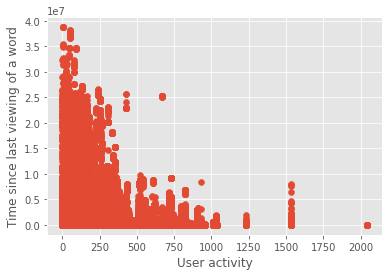

In [43]:
plt.scatter(user_act.user_activity, user_act.delta)
plt.xlabel('User activity')
plt.ylabel('Time since last viewing of a word')
plt.show()

#### 6. Hexbin plot the relation between history_seen and p_recall with log scale

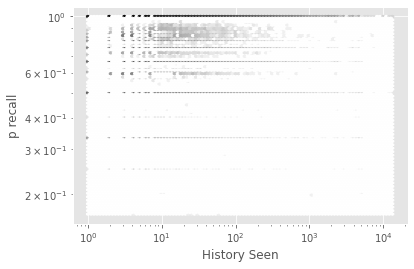

In [82]:
user_act_plot = user_act.loc[user_act.p_recall>0, :]
plt.hexbin(user_act_plot.history_seen, user_act_plot.p_recall, xscale='log', yscale='log', bins='log', cmap='binary')
plt.xlabel('History Seen')
plt.ylabel('p recall')
plt.show()

#### 7. Create a dataframe with user_id and user_activity based on user_id index

In [75]:
b = pd.DataFrame()
b['user_id'] = user_activity.index
b['user_activity'] = user_activity.values

#### 8. Merge dataframe a onto original dataframe

In [76]:
user_act = user_act.merge(b, on='user_id', how='inner')

In [77]:
user_act.describe()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct,entries,duration,activity,user_activity_x,user_activity_y,user_activity
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.894955,1.362118e+09,6.145372e+05,21.659757,19.105828,1.788163,1.615618,162.868318,4.050752,190.772998,162.868318,162.868318,162.868318
std,0.273827,2.511090e+04,1.997129e+06,120.081596,103.611832,1.333740,1.294637,198.001520,6.137678,290.186529,198.001520,198.001520,198.001520
min,0.000000,1.362076e+09,1.000000e+00,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.362095e+09,5.040000e+02,3.000000,3.000000,1.000000,1.000000,49.000000,0.221667,16.011861,49.000000,49.000000,49.000000
50%,1.000000,1.362110e+09,7.157600e+04,7.000000,6.000000,1.000000,1.000000,102.000000,0.783889,86.668015,102.000000,102.000000,102.000000
75%,1.000000,1.362143e+09,3.431455e+05,15.000000,14.000000,2.000000,2.000000,204.000000,4.944444,274.962742,204.000000,204.000000,204.000000
max,1.000000,1.362161e+09,3.877671e+07,13348.000000,12728.000000,20.000000,20.000000,2041.000000,21.616111,25200.000000,2041.000000,2041.000000,2041.000000


#### 9. Get summary statistics of p_recall when user_activity is less than 8 and greater than 59 respectively

In [69]:
user_act[['user_activity_x', 'p_recall']][(user_act['user_activity_x']>59)].describe()


,user_activity_x,p_recall
count,691724.000000,691724.000000
mean,220.928052,0.894502
std,213.628708,0.281582
min,60.000000,0.000000
25%,97.000000,1.000000
50%,153.000000,1.000000
75%,261.000000,1.000000
max,2041.000000,1.000000


In [68]:
user_act[['user_activity_x', 'p_recall']][(user_act['user_activity_x']<8)].describe()


,user_activity_x,p_recall
count,21922.000000,21922.000000
mean,5.929568,0.902981
std,1.784131,0.192375
min,1.000000,0.000000
25%,6.000000,0.833333
50%,7.000000,1.000000
75%,7.000000,1.000000
max,7.000000,1.000000


#### 10. Hexbin plot the relation between delta and p_recall with log scale

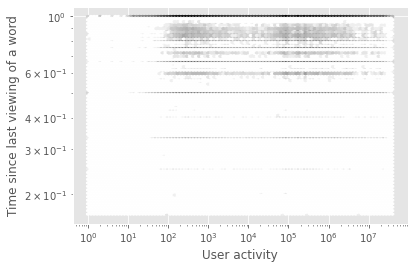

In [83]:
user_act_plot = user_act.loc[user_act.p_recall>0, :]
plt.hexbin(user_act_plot.delta, user_act_plot.p_recall, xscale='log', yscale='log', bins='log', cmap='binary')
plt.xlabel('User activity')
plt.ylabel('Time since last viewing of a word')
plt.show()

#### 11. Hexbin plot the relation between user_activity and delta with log scale

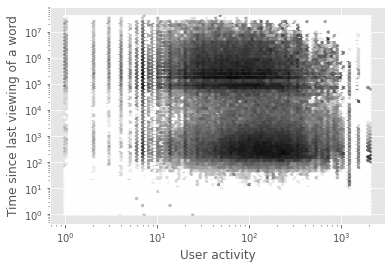

In [79]:
plt.hexbin(user_act.user_activity, user_act.delta, xscale='log', yscale='log', bins='log', cmap='binary')
plt.xlabel('User activity')
plt.ylabel('Time since last viewing of a word')
plt.show()

## Temporal patterns and Time Series

#### 1. Plot the general all users activity pattern to see what time people are pretty active during a day

In [49]:
np.round((user_act.timestamp - user_act.timestamp.min())/60, 0).value_counts().head()

146.0    1624
436.0    1557
211.0    1551
199.0    1528
176.0    1507
Name: timestamp, dtype: int64

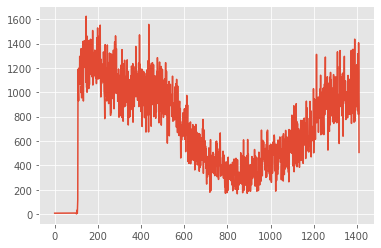

In [48]:
plt.plot(np.round((user_act.timestamp - user_act.timestamp.min())/60, 0).value_counts().sort_index())

#### 2. Visualize each interface language users daily activity pattern onto a single plot. 

In [50]:
dt.datetime.fromtimestamp(user_act.timestamp.min())

datetime.datetime(2013, 2, 28, 10, 28, 1)

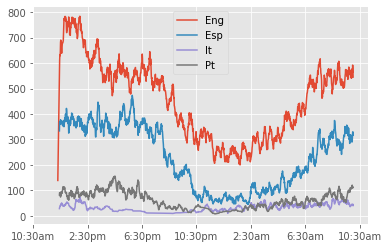

In [86]:
win = 10
hours = 60
plt.plot(pd.Series(np.round((user_act[user_act.ui_language == 'en'].timestamp - user_act.timestamp.min())/60, 0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((user_act[user_act.ui_language == 'es'].timestamp - user_act.timestamp.min())/60, 0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((user_act[user_act.ui_language == 'it'].timestamp - user_act.timestamp.min())/60, 0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((user_act[user_act.ui_language == 'pt'].timestamp - user_act.timestamp.min())/60, 0).value_counts().sort_index()).rolling(window=win).mean())
plt.legend(['Eng', 'Esp', 'It', 'Pt']) 
plt.xticks([0, 4*hours, 8*hours, 12*hours, 16*hours, 20*hours, 24*hours], ['10:30am', '2:30pm', '6:30pm', '10:30pm', '2:30am', '6:30am', '10:30am'])
plt.show()